Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel.5 Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.

In [0]:
import numpy as np

In [0]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)


In [0]:
X, y = mnist["data"], mnist["target"]

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

  

In [0]:
X_train, X_val, X_test, y_train, y_val, y_test = X[:60000], X[:10000], X[60000:], y[:60000], y[:10000], y[60000:]

In [0]:
from scipy import ndimage, misc

def shift_image(image, dx, dy):
  image = image.reshape((28, 28))
  shifted_image = ndimage.interpolation.shift(image, [dx, dy], cval=0, mode='constant')
  return shifted_image.reshape([-1])

In [0]:
image = X_train[1000]
shifted_down = shift_image(image, 0, 5)
shifted_left = shift_image(image, -5, 0)


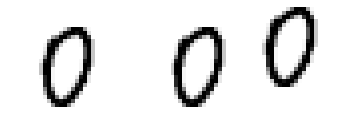

In [26]:
plot_digits((image, shifted_down, shifted_left))


In [0]:
# augment data
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in (1, 0), (-1, 0), (0, 1), (0, -1):
  for image, label in zip(X_train, y_train):
    X_train_augmented.append(shift_image(image, dx, dy))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [0]:
# randome shuffle of X_train data 
shuffle_idx = np.random.permutation(len(X_train_augmented))

X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]


In [31]:
# Multilabel classification
from sklearn.neighbors import KNeighborsClassifier

best_params = {'n_neighbors': 3, 'weights': 'distance'}
knn_clf = KNeighborsClassifier(**best_params)

knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [39]:
from sklearn.metrics import accuracy_score

y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763